In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
import pickle, json
from metrics import testDLModels, testMLModel, pretraitement_review
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
model = load_model("modelDL/lstm/lstmModelV4.h5")
tokenizer = pickle.load(open("modelDL/lstm/lstmtokenizerV4.pkl","rb"))
max_len = json.load(open("modelDL/lstm/lstmconfigV4.json"))["max_len"]
class_names = json.load(open("modelDL/lstm/lstmclass_namesV4.json"))

In [5]:
df = pd.read_csv("archive/clean_IMDB3.csv")

tokens_test = df["clean_review"].apply(ast.literal_eval)   
X_text = tokens_test.apply(lambda t: " ".join(t)).tolist() 

y_test = df["sentiment"].map({"negative":0,"positive":1}).values

In [6]:
X_seq = tokenizer.texts_to_sequences(X_text)
X_pad = pad_sequences(X_seq, maxlen=max_len)

In [9]:
y_prob = model.predict(X_pad, verbose=0).ravel()
y_pred = (y_prob >= 0.5).astype(int)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 (weighted):", f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

Accuracy: 0.9068
F1 (weighted): 0.9067958906681012
              precision    recall  f1-score   support

    negative       0.91      0.90      0.91     25000
    positive       0.90      0.91      0.91     25000

    accuracy                           0.91     50000
   macro avg       0.91      0.91      0.91     50000
weighted avg       0.91      0.91      0.91     50000



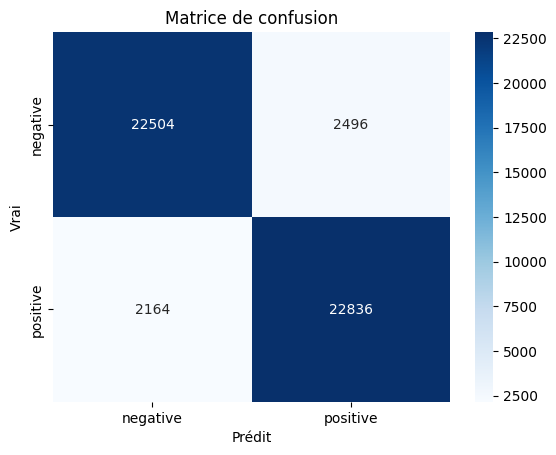

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Prédit"); plt.ylabel("Vrai"); plt.title("Matrice de confusion"); plt.show()

In [12]:
review = "This movie was great ! amazing !"
result = pretraitement_review(model, review, tokenizer, class_names)
print(result)

('positive', 0.7994994521141052)


### CNN Evaluation

In [13]:
modelcnn = load_model("modelDL/CNN/cnnModelV2.h5")
tokenizer = pickle.load(open("modelDL/CNN/cnntokenizerV2.pkl","rb"))
max_len = json.load(open("modelDL/CNN/cnnconfigV2.json"))["max_len"]
class_names = json.load(open("modelDL/CNN/cnnclass_namesV2.json"))
historycnn = json.load(open("modelDL/CNN/cnnhistoryV2.json"))


=== Évaluation ===
Accuracy : 0.9420
Precision (binary) : 0.9495
Recall    (binary) : 0.9336
F1-score  (binary) : 0.9415

Rapport de classification :
              precision    recall  f1-score   support

    negative       0.93      0.95      0.94     25000
    positive       0.95      0.93      0.94     25000

    accuracy                           0.94     50000
   macro avg       0.94      0.94      0.94     50000
weighted avg       0.94      0.94      0.94     50000



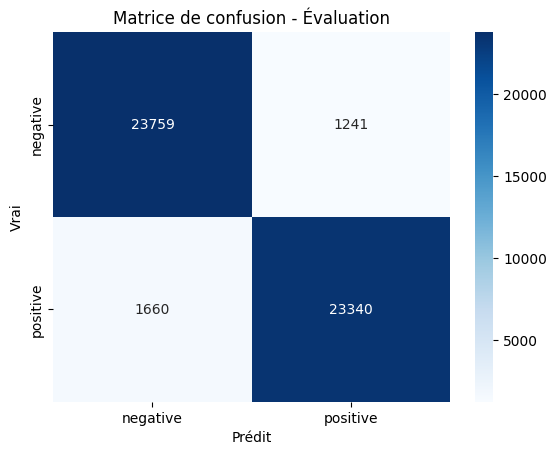

{'accuracy': 0.94198,
 'precision': 0.9495138521622392,
 'recall': 0.9336,
 'f1': 0.9414896835481333,
 'cm': array([[23759,  1241],
        [ 1660, 23340]], dtype=int64)}

In [14]:
testDLModels(modelcnn, X_pad, y_test,historycnn, class_names=class_names)

In [15]:
def predict_cnn(text, model, tokenizer, max_len=200):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_len)
    p = float(model.predict(pad, verbose=0).ravel()[0])  # proba positive
    label = "positive" if p >= 0.5 else "negative"
    return label, p

In [20]:
print(predict_cnn("This movie was great ! amazing !", modelcnn, tokenizer))

('positive', 0.5247975587844849)
